In [16]:
from statsmodels.tsa.arima.model import ARIMA
import utils

In [17]:
eth_data = utils.load_eth_data()

eth_data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,129.630661,132.835358,129.198288,130.802002,130.802002,7935230330
2020-01-02,130.820038,130.820038,126.954910,127.410179,127.410179,8032709256
2020-01-03,127.411263,134.554016,126.490021,134.171707,134.171707,10476845358
2020-01-04,134.168518,136.052719,133.040558,135.069366,135.069366,7430904515
2020-01-05,135.072098,139.410202,135.045624,136.276779,136.276779,7526675353


In [18]:
close_data = eth_data['Close']
close_data.head()

Date
2020-01-01    130.802002
2020-01-02    127.410179
2020-01-03    134.171707
2020-01-04    135.069366
2020-01-05    136.276779
Name: Close, dtype: float64

In [19]:
close_data.shape

(1733,)

In [20]:
test_size = 15
train_size = 100

train_data, test_data = utils.split_train_test(close_data, train_size, test_size)

print(train_data.shape)
print(test_data.shape)

(85,)
(15,)


In [21]:
model = ARIMA(train_data, order=(5, 1, 0))
model_fit = model.fit()

model_fit.summary()

/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                   85
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -503.442
Date:                Sat, 28 Sep 2024   AIC                           1018.883
Time:                        23:54:02   BIC                           1033.468
Sample:                    06-21-2024   HQIC                          1024.746
                         - 09-13-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0203      0.124      0.164      0.870      -0.222       0.263
ar.L2          0.1903      0.134      1.419      0.156      -0.073       0.453
ar.L3         -0.0705      0.118     -0.596      0.551      -0.302       0.161
ar.L4         -0.0859      0.091     -0.945      0.344      -0.264       0.092
ar.L5          0.1036      0.165      0.628      0.530      -0.220       0.427
sigma2      9372.6346   1432.718      6.542      0.000    6564.560    1.22e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 5.79
Prob(Q):                              0.96   Prob(JB):                         0.06
Heteroskedasticity (H):               0.60   Skew:                             0.20
Prob(H) (two-sided):                  0.19   Kurtosis:                         4.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
predictions = model_fit.forecast(steps=len(test_data))

predictions[:5]

2024-09-14    2454.577698
2024-09-15    2475.974051
2024-09-16    2466.207912
2024-09-17    2464.585649
2024-09-18    2468.344655
Freq: D, Name: predicted_mean, dtype: float64

In [23]:
mae, mse, rmse = utils.get_metrics(test_data, predictions)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

MAE: 132.83857600744696
MSE: 21086.976576872654
RMSE: 145.21355507277084


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


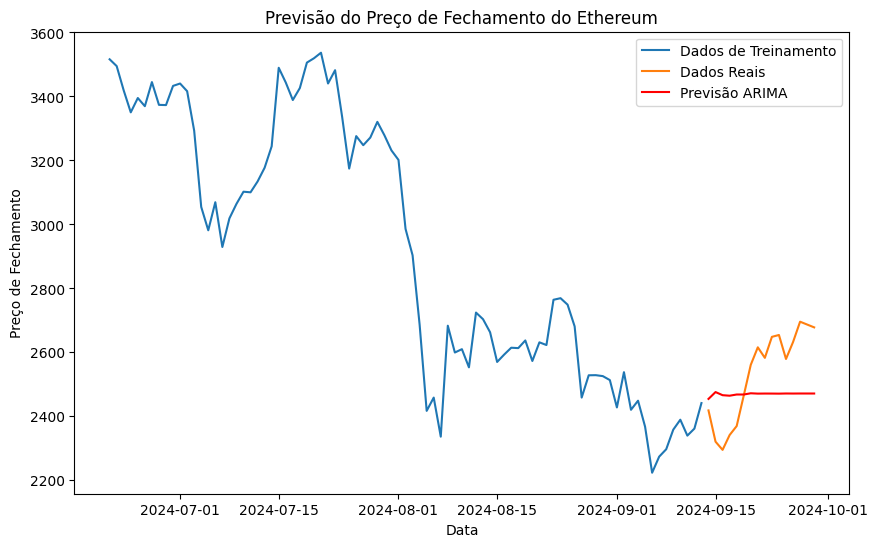

In [24]:
utils.plot_previsions(train_data, test_data, predictions)

# Melhorando o modelo com auto arima

In [25]:
from pmdarima import auto_arima

In [26]:
auto_model = auto_arima(train_data, seasonal=False, stepwise=True, suppress_warnings=True)
print(auto_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   85
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -505.549
Date:                Sat, 28 Sep 2024   AIC                           1013.098
Time:                        23:54:03   BIC                           1015.529
Sample:                    06-21-2024   HQIC                          1014.075
                         - 09-13-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      9888.4984   1125.347      8.787      0.000    7682.858    1.21e+04
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                12.02
Prob(Q):                              0.91   Pr

In [27]:
auto_model = ARIMA(train_data, order=auto_model.order)
auto_model_fit = model.fit()

/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [28]:
predictions_auto = auto_model_fit.forecast(steps=len(test_data))
predictions_auto[:5]

2024-09-14    2454.577698
2024-09-15    2475.974051
2024-09-16    2466.207912
2024-09-17    2464.585649
2024-09-18    2468.344655
Freq: D, Name: predicted_mean, dtype: float64

In [29]:
mse, mae, rmse = utils.get_metrics(test_data, predictions)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

MSE: 132.83857600744696
MAE: 21086.976576872654
RMSE: 145.21355507277084


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/noteooks/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


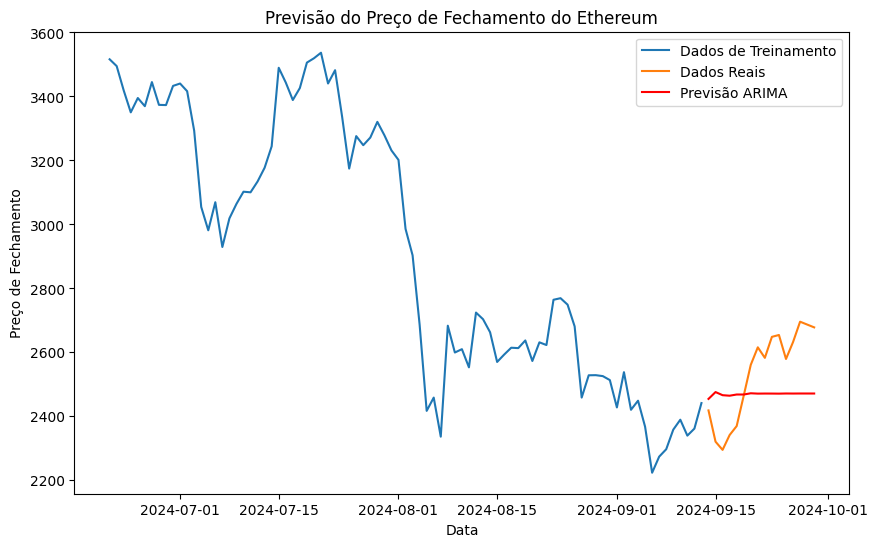

In [30]:
utils.plot_previsions(train_data, test_data, predictions)

O ARIMA não teve resultados tão interessantes, mesmo com o uso do Auto Arima